In [ ]:
import glob
import os
import pickle
import sys

sys.path.append(os.path.abspath(".."))

import matplotlib.pyplot as plt

import src.params as params
import src.sf_funcs as sf

times_to_gap = params.times_to_gap
pwrl_range = params.pwrl_range
data_path_prefix = params.data_path_prefix
run_mode = params.run_mode

spacecraft = "wind"
file_index_test = 0
# this simply refers to one of the files in the test files, not the "file_index" variable referring to the original raw file
n_bins = 25

with_sfs = False

# Importing processed time series and structure functions
if spacecraft == "wind":
    input_file_list = [
        sorted(glob.glob(data_path_prefix + "../data/processed/wind/test/wi_*v05.pkl"))
    ][0]
elif spacecraft == "psp":
    input_file_list = [
        sorted(glob.glob(data_path_prefix + "../data/processed/psp/test/psp_*v02.pkl"))
    ][0]
else:
    raise ValueError("Spacecraft must be 'psp' or 'wind'")

file = input_file_list[file_index_test]
try:
    with open(file, "rb") as f:
        data = pickle.load(f)
except pickle.UnpicklingError:
    print(f"UnpicklingError encountered in file: {file}.")
except EOFError:
    print(f"EOFError encountered in file: {file}.")
except Exception as e:
    print(f"An unexpected error {e} occurred with file: {file}.")

# Unpack the dictionary, fresh each time, esp. for ints_gapped_metadata re-writing
files_metadata = data["files_metadata"]
ints_metadata = data["ints_metadata"]
ints = data["ints"]
ints_gapped_metadata = data["ints_gapped_metadata"]
ints_gapped = data["ints_gapped"]  # Not used here
sfs = data["sfs"]
sfs_gapped = data["sfs_gapped"]

print(
    f"Successfully read in {input_file_list[file_index_test]}. This contains {len(ints_metadata)}x{times_to_gap} intervals"
)
# Importing lookup table
with open(
    f"../results/{run_mode}/correction_lookup_2d_{n_bins}_bins_lint.pkl", "rb"
) as f:
    correction_lookup_2d = pickle.load(f)
with open(
    f"../results/{run_mode}/correction_lookup_3d_{n_bins}_bins_lint.pkl", "rb"
) as f:
    correction_lookup_3d = pickle.load(f)
with open(
    f"../results/{run_mode}/correction_lookup_3d_{n_bins}_bins_lint_SMOOTHED.pkl",
    "rb",
) as f:
    correction_lookup_3d_smoothed = pickle.load(f)

# Apply 2D and 3D scaling to test set, report avg errors
print(
    f"Correcting {len(ints_metadata)} intervals using 2D error heatmap with {n_bins} bins"
)
sfs_lint_corrected_2d = sf.compute_scaling(sfs_gapped, 2, correction_lookup_2d, n_bins)

Successfully read in ../data/processed/wind/test\wi_h2_mfi_20160103_v05.pkl. This contains 1x25 intervals
Correcting 1 intervals using 2D error heatmap with 25 bins
Loaded 2D lookup table with 25 bins


In [5]:
sfs

,int_index,file_index,lag,n,missing_percent,sf_2,sf_2_se,acf_from_sf
1.0,0,0,1.0,9999,0.0,0.054989,0.002004,0.990834
2.0,0,0,2.0,9998,0.0,0.113656,0.004479,0.981055
3.0,0,0,3.0,9997,0.0,0.159526,0.005963,0.973410
4.0,0,0,4.0,9996,0.0,0.200487,0.006934,0.966582
5.0,0,0,5.0,9995,0.0,0.239960,0.007839,0.960003
...,...,...,...,...,...,...,...,...
1995.0,0,0,1995.0,8005,0.0,6.245404,0.061986,-0.041005
1996.0,0,0,1996.0,8004,0.0,6.249756,0.062023,-0.041730
1997.0,0,0,1997.0,8003,0.0,6.253009,0.062048,-0.042272
1998.0,0,0,1998.0,8002,0.0,6.256148,0.062054,-0.042796


In [11]:
single_sf = sfs_lint_corrected_2d.loc[
    (sfs_lint_corrected_2d.file_index == 0) * (sfs_lint_corrected_2d.int_index == 0)
    & (sfs_lint_corrected_2d.version == 2)
]
single_sf.head()

,lag,n,missing_percent,sf_2,sf_2_se,file_index,int_index,version,gap_handling,sf_2_corrected_2d,sf_2_lower_corrected_2d,sf_2_upper_corrected_2d,scaling,scaling_lower,scaling_upper
1.0,1.0,6819,31.803180,0.039761,0.002498,0,0,2,lint,0.039761,0.039761,0.039761,1.349594,1.253174,1.462089
2.0,2.0,6806,31.926385,0.084829,0.005816,0,0,2,lint,0.084829,0.084829,0.084829,1.328088,1.229380,1.444031
3.0,3.0,6795,32.029609,0.120368,0.007572,0,0,2,lint,0.120368,0.120368,0.120368,1.298008,1.190164,1.427344
4.0,4.0,6788,32.092837,0.151941,0.008560,0,0,2,lint,0.151941,0.151941,0.151941,1.286922,1.178846,1.416816
5.0,5.0,6784,32.126063,0.181797,0.009473,0,0,2,lint,0.181797,0.181797,0.181797,1.278989,1.170323,1.409900


C:\Users\spann\AppData\Local\Temp\ipykernel_22768\2691068396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_sf["sf_2_corr"] = single_sf.sf_2 * single_sf.scaling


In [ ]:
import matplotlib.patches as patches
import numpy as np
from scipy.interpolate import interp1d

In [72]:
# Example data (replace with your actual data)
x = single_sf.lag
y = single_sf.scaling

# Define log-spaced bin edges
num_bins = 20  # Adjust for more/less smoothing
bin_edges = np.logspace(np.log10(x.min()), np.log10(x.max()), num_bins)

# Compute bin centers and average y values in each bin
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
y_binned = np.array(
    [
        y[(x >= bin_edges[i]) & (x < bin_edges[i + 1])].mean()
        for i in range(len(bin_edges) - 1)
    ]
)

# Interpolate binned data back to original x points
interp_func = interp1d(bin_centers, y_binned, kind="cubic", fill_value="extrapolate")
y_interp = interp_func(x)

C:\Users\spann\AppData\Local\Temp\ipykernel_22768\2388172533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_sf["sf_2_corr"] = single_sf.sf_2 * single_sf.scaling


(100, 2300)

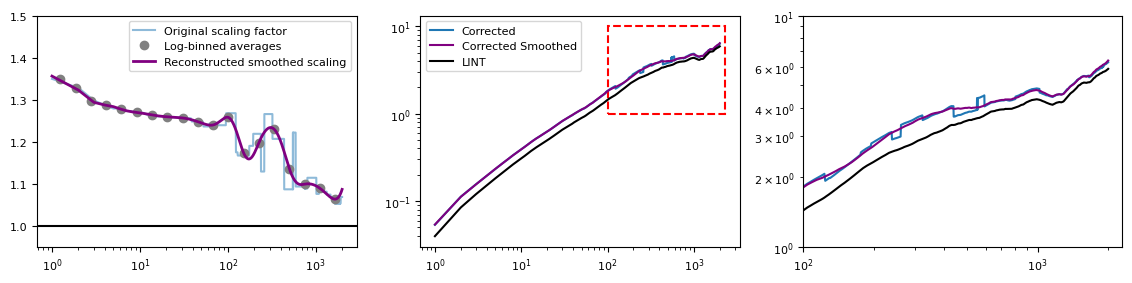

In [73]:
single_sf["sf_2_corr"] = single_sf.sf_2 * single_sf.scaling
# scaling_smooth = savgol_filter(single_sf.scaling, 100, 1)
scaling_smooth = y_interp
sf_2_corr_smoothed = single_sf.sf_2 * scaling_smooth

plt.rcParams.update({"font.size": 8})  # Adjust size globally (default ~10-12)

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
ax[0].plot(
    single_sf["lag"],
    single_sf["scaling"],
    label="Original scaling factor",
    alpha=0.5,
    # linestyle="--",
)
ax[0].plot(
    bin_centers,
    y_binned,
    marker="o",
    linestyle="None",
    label="Log-binned averages",
    c="grey",
    lw=2,
)
ax[0].plot(x, y_interp, linewidth=2, label="Reconstructed smoothed scaling", c="purple")


ax[0].axhline(1, c="black")
ax[0].semilogx()
ax[0].set_ylim(0.95, 1.5)
ax[0].legend()

ax[1].plot(single_sf["sf_2_corr"], label="Corrected")
ax[1].plot(sf_2_corr_smoothed, label="Corrected Smoothed", c="purple")
ax[1].plot(single_sf["sf_2"], label="LINT", c="black")

ax[1].semilogx()
ax[1].semilogy()
ax[1].legend()

# Define inset region (same limits as ax[2])
x_min, x_max = 100, 2300
y_min, y_max = 1, 10

# Add a rectangle to show the inset region
rect = patches.Rectangle(
    (x_min, y_min),  # Bottom-left corner (x, y)
    x_max - x_min,  # Width
    y_max - y_min,  # Height
    linewidth=1.5,
    edgecolor="red",
    facecolor="none",
    linestyle="dashed",
)
ax[1].add_patch(rect)  # Add rectangle to ax[1]


ax[2].plot(single_sf["sf_2_corr"], label="Corrected")
ax[2].plot(sf_2_corr_smoothed, label="Corrected Smoothed", c="purple")
ax[2].plot(single_sf["sf_2"], label="LINT", c="black")

ax[2].semilogx()
ax[2].semilogy()
ax[2].set_ylim(1, 10)
ax[2].set_xlim(100, 2300)